In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [10]:
df = pd.read_csv("../Data/RawLiftingData.csv")

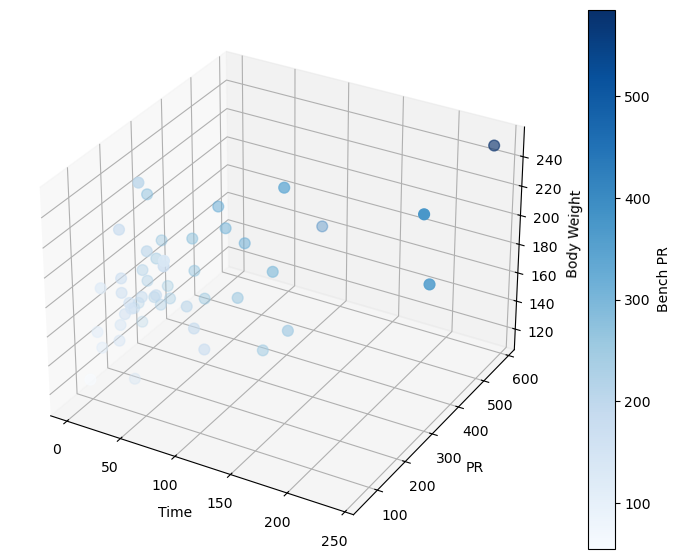

In [11]:
#Creating a figure with a width and height of 10 and 7
fig = plt.figure(figsize=(10,7))
#Forcing 3D projection, creating only 1 plot
chart = fig.add_subplot(111, projection='3d')

#Creating the xyz variables
x = df['Time']
y = df['PR']
z = df['BodyWeight']

#Creating scatter plot, using the xyz variables, with the plasma color gradient and a dot size of 60
scatter = chart.scatter(x,y,z, c=y, cmap='Blues', s=60)

#Creating the axes labels
chart.set_xlabel('Time')
chart.set_ylabel('PR')
chart.set_zlabel('Body Weight')

#Showing the plotting
#Adding a legend to show color
fig.colorbar(scatter, label='Bench PR')
#Showing data
plt.show()

In [12]:
#Creating independent and dependant variables
#Independent
x1 = df['Time']
x2 = df['BodyWeight']

#Dependent
y = df['PR']

#Creating the 2D array.
xMatrix = np.column_stack((x1, x2))

#Printing the 2D array.
print("xMatrix shape:", xMatrix.shape)
print("xMatrix:\n", xMatrix[:49])

xMatrix shape: (49, 2)
xMatrix:
 [[ 30 156]
 [ 12 140]
 [ 36 160]
 [ 60 160]
 [ 48 195]
 [ 60 165]
 [228 235]
 [ 24 160]
 [  8 168]
 [  8 178]
 [ 72 156]
 [  2 150]
 [  2 216]
 [ 24 165]
 [144 162]
 [ 24 160]
 [ 18 180]
 [120 142]
 [120 190]
 [ 12 185]
 [ 60 208]
 [ 18 165]
 [ 18 155]
 [120 192]
 [120 240]
 [ 24 167]
 [ 24 115]
 [240 250]
 [ 60 215]
 [ 12 155]
 [ 48 175]
 [ 24 195]
 [240 195]
 [ 12 154]
 [ 96 172]
 [ 18 170]
 [ 84 195]
 [ 12 155]
 [  6 140]
 [ 84 146]
 [ 48 198]
 [ 12 140]
 [ 18 240]
 [ 72 206]
 [  6 210]
 [ 36 170]
 [  5 180]
 [ 12 130]
 [ 24 185]]


In [13]:
#Creating the empty model
model = LinearRegression()

#Calculating regression, just like the m = n∑(xy) - ∑(x)∑(y) / n∑x^2 - ∑x^2, then the b portion as well. Using that formula, to calculate our regression formula.
#However with a third variable added. Using the normal equation and matricies instead. With the matrix X being xMatrix and y being our y column of data in the CSV
# β̂ = (XᵗX)⁻¹ Xᵗy
model.fit(xMatrix, y)

#Getting our intercept from the model, b0 of y = b0 + b1(x1) + b2(x2)
b0 = model.intercept_
#Getting our slopes from the model
b1, b2 = model.coef_

#Printing our regression equation
print(f"Equation: BenchPressPR = {b0:.2f} + {b1:.2f} * Time + {b2:.2f} * BodyWeight")
#Along with our R score, with model.predict being the above equation implemented in code form
#r2 being the regression coeffecient
yHat = model.predict(xMatrix)
r2 = r2_score(y, yHat)
print(f"R² Score: {r2:.4f}")

Equation: BenchPressPR = -10.80 + 0.84 * Time + 1.10 * BodyWeight
R² Score: 0.6291


In [14]:
#Creating the regression plane

#Creating the dimensions of the plane, via bounds of each column
xRange = np.linspace(x.min(), x.max(), 49)
zRange = np.linspace(z.min(), z.max(), 49)

#Creating a grid of all values
xGrid, zGrid = np.meshgrid(xRange, zRange)

#Compressing both grids into a 1D array
xFlat = xGrid.ravel()
zFlat = zGrid.ravel()

#Making both into a new matrix, like, time1,time1,time1,time1,infinity... weight1,weight2,weight3,weight4, etc.
#Until time2,time2,time2,infinity, weight1,weight2,weight3, etc.
gridInput = np.column_stack((xFlat, zFlat))

#New yHat! Because now were using the new matrix created from flattening the xGrid and zGrid,
#and using that as the matrix for the normal equation, gridInput is now our X in β̂ = (XᵗX)⁻¹ Xᵗy
finalYHat = model.predict(gridInput)

#Creating the regression plane. We are using the shape of xGrid to make sure
#That Y grid has the same dimensions as the xGrid
yGrid = finalYHat.reshape(xGrid.shape)

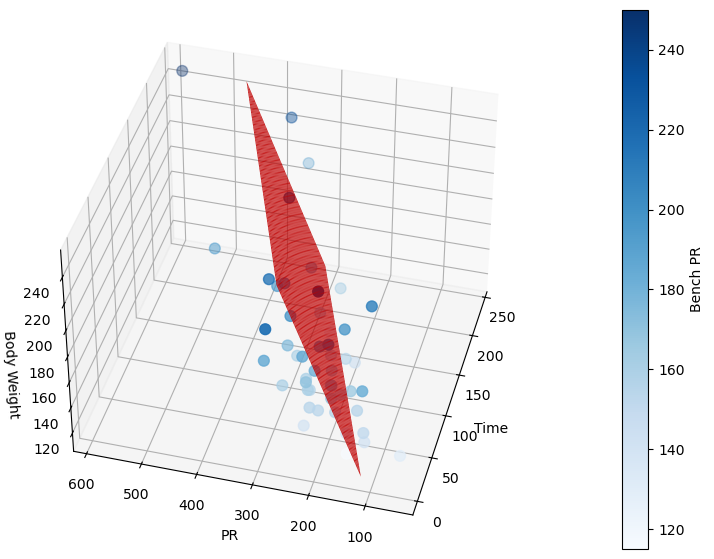

In [15]:
#Plotting Regression Plane

#Creating a figure with a width and height of 10 and 7
fig = plt.figure(figsize=(10,7))
#Forcing 3D projection, creating only 1 plot
chart = fig.add_subplot(111, projection='3d')

#Creating the xyz variables
x = df['Time']
y = df['PR']
z = df['BodyWeight']

#Creating scatter plot, using the xyz variables, with the plasma color gradient and a dot size of 60
scatter = chart.scatter(x,y,z, c=z, cmap='Blues', s=60)



#Plotting the regression plane
chart.plot_surface(xGrid, yGrid, zGrid, alpha=0.9, color='red')



#Creating the axes labels
chart.set_xlabel('Time')
chart.set_ylabel('PR')
chart.set_zlabel('Body Weight')

#Adjusting view
chart.view_init(elev=40, azim=195)

#Showing the plotting
#Adding a legend to show color
fig.subplots_adjust(right=0.85)
cbar = fig.colorbar(scatter, pad=0.1)
cbar.set_label('Bench PR')
#Showing data
plt.show()




In [16]:
#Calculating extra stuff.. 
residuals = np.array([
     38.822869, 71.514981, 39.394516, 49.309317, -69.209800, -16.199500, -63.919323,
     39.437115, -5.986859, -17.004493, -36.326229, -41.133820, 57.149800, -41.071702,
     -53.192404, 84.437115, 7.423148, -6.071939, -23.956579, 91.935631, -133.575323,
     -21.050402, -40.032769, 148.839894, -39.044746, -8.275228, 19.016465, 119.511628,
     38.712333, -0.011469, 52.825466, -19.124602, -54.891389, 31.090294, -14.039641,
     33.440781, 40.662402, 44.988531, -33.463719, -45.351195, 22.484909, -3.485019,
     -63.682653, 18.585604, -45.587153, -16.623118, -71.697370, -87.467386, 21.893031
])

mean_resid = residuals.mean()
std_resid = residuals.std()
percent_positive = np.sum(residuals > 0) / len(residuals) * 100
max_pos = residuals.max()
max_neg = residuals.min()

print(f"Mean Residual: {mean_resid:.2f}")
print(f"Standard Deviation: {std_resid:.2f}")
print(f"Percent Underpredicted (residual > 0): {percent_positive:.1f}%")
print(f"Largest Underprediction: {max_pos:.2f}")
print(f"Largest Overprediction: {max_neg:.2f}")

Mean Residual: -0.00
Standard Deviation: 54.27
Percent Underpredicted (residual > 0): 42.9%
Largest Underprediction: 148.84
Largest Overprediction: -133.58
